In [1]:
# import packages

import nugridse as mp
import os, sys, fnmatch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load restart.h5 or out.h5 files

a = mp.se('.','restart.h5')


Searching files, please wait.......
Reading preprocessor files
File search complete.


In [6]:
# settin up the stage for plotting
models = [a]
cyc =  models[0].se.cycles   #  [6410]
sparsity = 1000 # sparsity factor applied on cyc to make plots.

limit_x = [1.022,1.027]
limit_y = [5.0e-9,2.5]

# species I want to plot
species = ['H-1','He-4','C-12','C-13','C-14','N-14','Ne-22','Fe-56','Cu-65','Kr-86','Sr-88']


# symbols and line weight used for the plot
symb = ['r-','g-','b-','c-','m-','k-','y-','r--','g--','b--','c--','m--','k--','y--']
line_weight = ['2.','5.']

#name_movie = 'test.avi'

cyc= 0000000010
 reading ['dcoeff']...100%tmp0010.jpg


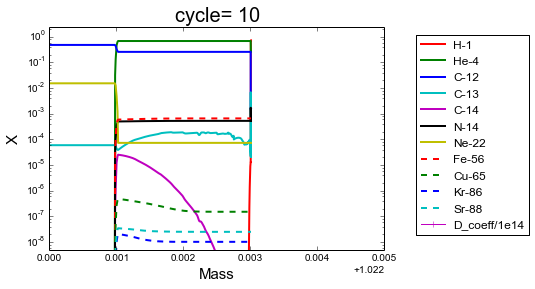

In [7]:
I_want_ratio = False

if not I_want_ratio:
    ii = 0
    for i in models:
        jjj = 0
        for k in cyc[::sparsity]:
            print 'cyc=',k
            #figure(jjj)
            #
            jj = 0
            for j in species:
                if ii == 0:
                    plt.semilogy(i.se.get(k,'mass'),i.se.get(k,'iso_massf',j),symb[jj],linewidth=line_weight[ii],label=species[jj])
                elif ii>0:
                    plt.semilogy(i.se.get(k,'mass'),i.se.get(k,'iso_massf',j),symb[jj],linewidth=line_weight[ii])
                jj=jj+1
            plt.semilogy(i.se.get(k,'mass'),i.se.get(k,'dcoeff')/1.e14,'m-+',label='D_coeff/1e14')
            # for the figure
            plt.title('cycle= '+str(int(k)), fontsize=20)
            plt.legend(numpoints=1,loc='upper right',bbox_to_anchor=(1.45, 0.99),ncol=1,shadow=False)
            plt.ylim(limit_y[0],limit_y[1])
            plt.xlim(limit_x[0],limit_x[1])
            plt.xlabel('Mass', fontsize='15.')
            plt.ylabel('X', fontsize='15.')
            fname = "tmp%04d.jpg"%int(k)
            #fname = "tmp%04d.png"%int(k)
            print fname
            plt.savefig(fname)
            plt.show()
            #close()
            #
            jjj=jjj+1
        ii=ii+1
else:
    print('this can be developed to do plot of ratios')
    for ik in cyc:
        plt.semilogy(models[0].se.get(ik,'mass'),np.array(models[0].se.get(ik,'iso_massf','Mg-25'))/np.array(models[0].se.get(ik,'iso_massf','Mg-25')),symb[0],label='Mg-25')
        plt.semilogy(models[0].se.get(ik,'mass'),np.array(models[0].se.get(ik,'iso_massf','Mg-26'))/np.array(models[0].se.get(ik,'iso_massf','Mg-26')),symb[1],label='Mg-26')
        plt.semilogy(models[0].se.get(ik,'mass'),np.array(models[0].se.get(ik,'iso_massf','Zr-94'))/np.array(models[0].se.get(ik,'iso_massf','Zr-94')),symb[2],label='Zr-94')
        plt.semilogy(models[0].se.get(ik,'mass'),np.array(models[0].se.get(ik,'iso_massf','Zr-96'))/np.array(models[0].se.get(ik,'iso_massf','Zr-96')),symb[3],label='Zr-96')
        plt.axhline(y=1.,color='k',ls='dashed')


In [5]:
#os.system('mencoder "mf://tmp*jpg" -mf fps=1 -o '+name_movie+' -ovc lavc -lavcopts vcodec=msmpeg4v2:vbitrate=800')
#os.system('mencoder "mf://*.jpg" -mf fps=1 -o '+name_movie+' -ovc lavc -lavcopts vcodec=msmpeg4v2:vbitrate=800')
#os.system('vlc '+name_movie)